
# **3. Installing & Importing Libraries**

- This section is emphasised on installing and importing the necessary libraries that will be required.

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

In [3]:
# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# **4. Data Acquisition & Description**
  

In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')

In [5]:
print('Data Shape:', data.shape)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

Data Shape: (18249, 14)
There are 18249 rows and 14 columns


In [6]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**To predict the future price of avocados depending on some variables / features we have such as**

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- Total Volume - Total number of avocados sold (small Hass + Large Hass + XLarge Hass + Total Bags)
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags = Small Bags + Large Bags + XLarge Bags
- type - conventional or organic
- year - the year
- region - the city or region of the observation


# **5. Data Pre-Processing**
- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.


#### Null & Duplicate Entry check:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

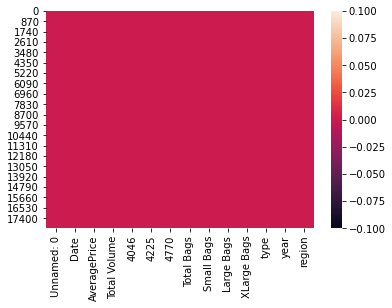

In [11]:
sns.heatmap(data.isnull());

In [12]:
print('total number of duplicate values : ',sum(data.duplicated()))

total number of duplicate values :  0


**We don't have any null or duplicate value. Lets continue with the descriptive analysis and further. The first column gives reduntant index data, so lets drop it**

In [13]:
data=data.drop(['Unnamed: 0'], axis=1)

In [14]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
datam=pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv') # Archieving main dataset

#### String Check

In [16]:
data.select_dtypes('object').columns

Index(['Date', 'type', 'region'], dtype='object')

## Outlier Detection

We can use **Standard Deviation** or **Quantile** to detect if any outliers

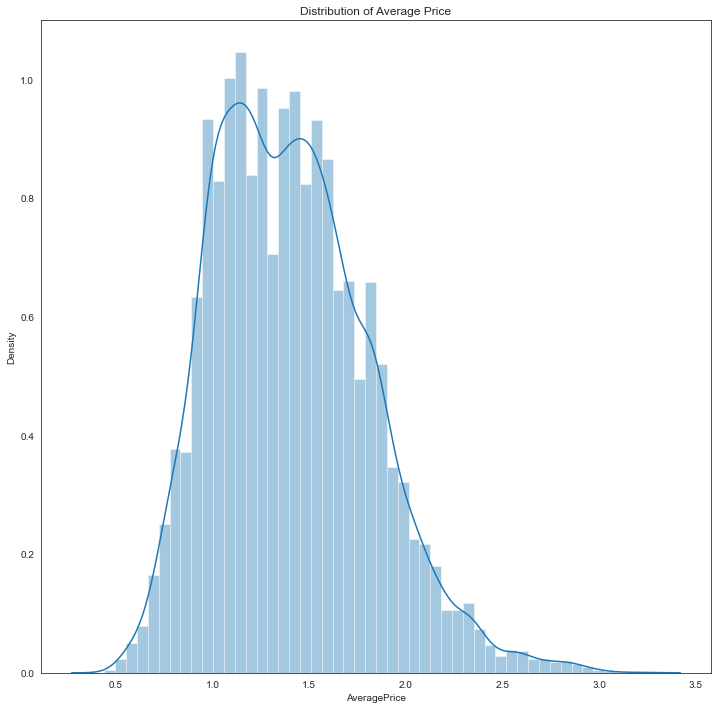

In [17]:
sns.set_style("white")

plt.figure(figsize=(12,12))
sns.distplot(data.AveragePrice)
plt.title("Distribution of Average Price",fontsize=12);

#### <font color="blue">Looks like positive skewed slightly

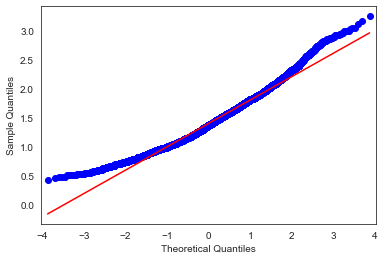

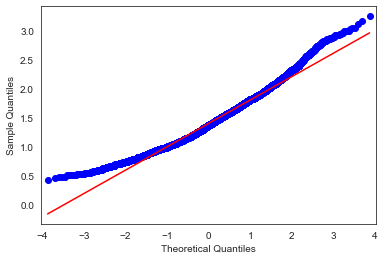

In [18]:
import statsmodels.api as sm
sm.qqplot(data.AveragePrice,line="s")

>- 1 std from mean : 68% of data included
- 2 std from mean : 95% of data included
- 3 std from mean : 99.7% of data included

In [19]:
mean = data.AveragePrice.mean()
std = data.AveragePrice.std()
lower, upper = mean-std*2,mean+std*2 # Use 2*std and it will exclude data that is not included in 95% of data
print("Lower Limit : {} Upper Limit : {}".format(lower,upper))

Lower Limit : 0.6006252987847824 Upper Limit : 2.211331520766983


In [21]:
outliers = [x for x in data.AveragePrice if x < lower or x > upper]

#### There is some data that is not included within 95% of data

In [22]:
df_exclude = data[(data.AveragePrice < upper) | (data.AveragePrice > lower)]

In [23]:
df_exclude.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [24]:
df_exclude.shape

(18249, 13)

In [25]:
data.shape

(18249, 13)

>- Q1 : Data that is located in 25% of total data
- Q2 : Median value of data
- Q3 : Data that is located in 75% of total data

$IQR = Q3 - Q1$

**Outlier:**

$Upper bound : 1.5*IQR + Q3$

$Lower bound : 1.5*IQR - Q1$

In [27]:
quantile = np.quantile(data.AveragePrice,[0.25,0.5,0.75,1]) # Use numpy quantile
IQR = quantile[2] - quantile[0] # Calculate IQR through third quantile - first quantile
upper = 1.5*IQR + quantile[2]
lower = quantile[0] - 1.5*IQR

print("Upper bound : {} Lower bound : {}".format(upper,lower))

outlier = [x for x in data.AveragePrice if x < lower or x>upper]

Upper bound : 2.4999999999999996 Lower bound : 0.26000000000000034


In [28]:
df_exclude2 = data[(data.AveragePrice > lower) | (data.AveragePrice < upper)]
df_exclude2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Data Normalization

It is important to check whether data follow normal distribution before we do modeling
There is one easy way to do normalization, use logarithmic scale

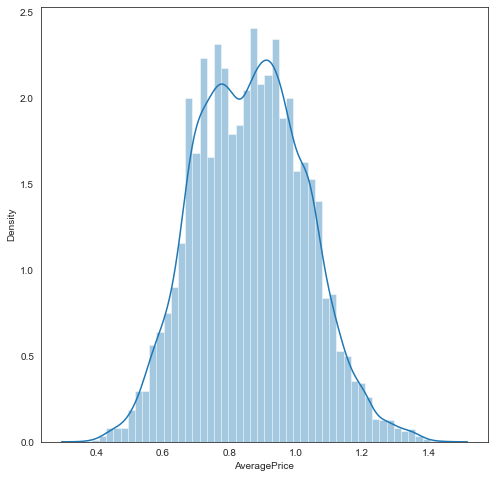

In [29]:
log_data = np.log(data.AveragePrice+1)
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.distplot(log_data);

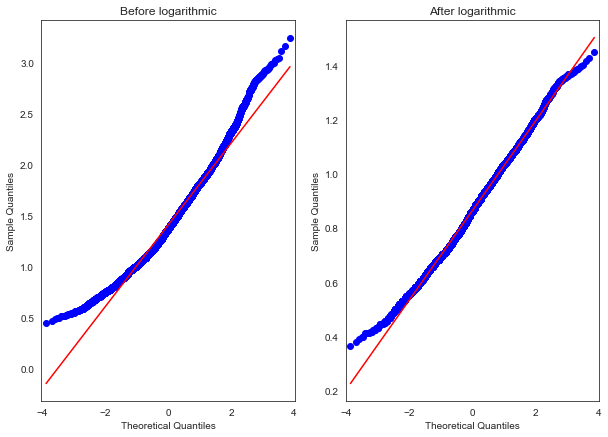

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,7))
sm.qqplot(data.AveragePrice,line="s",ax=ax[0])
ax[0].set_title("Before logarithmic")
sm.qqplot(log_data,line="s",ax=ax[1])
ax[1].set_title("After logarithmic");

#### It looks much closer to normal distribution after doing logarithmic


# **6. EDA & Class Imbalance Check**                            


### Region

In [31]:
len(data.region.unique())

54

In [32]:
data.groupby('region').size() 

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

**There are ~338 observations from each region, dataset seems balanced, and there are 54 regions.**

### Dates & Seasonality check

We have two columns which are 'Date' and 'year', being year the extracted year of date. To make the analysis easier, let's extract day and month out of 'Date' and see each value separately. That way, we are also going to have two more potentially usefull columns: day and month

In [36]:
from datetime import datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
# monday = 0
data['day of week'] = data['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
data[dates]

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


**Year**

- 2015, 2016, 2017 have almost the same values
- 2018 is the lowest, looks like the avocados should have ended in the begining of 2018

**Month**

- Shows a descending pattern, This could be because of the same reason as year: 2018 ended in the begging of the year and, therefore, the first months have more entries

**Day & day of week**

- We can see that the day chart has a repeating trend, and this is because of the day that the data was always recorded: day 6 (Sunday).
- The data was, therefore, recorded weekly, 'day of week' becomes redundant and we can eliminate it.

In [39]:
data.drop('day of week', axis=1, inplace=True)

<font color ='blue'>

- type' has to categories and is balanced, could be used as a classifier in model building
- 'region' has 54 unique values and is perfectly balanced, could be hot encoded for model building
- 'avg' price shows and pretty normal distribution and looks tentative for target variable for regression model
- units sold columns show similar data which is similarly distributed, log formulas could be used to increase model performance
- 'dates' is evenly distributed till 2018 and shows that the data was recorded on a weekly basis every Sunday

<font color ='blue'>

- From the graphic we can tell that the, first of all, average price and total volume move in different direction
- Total volume has a spike at the beginning of the year. On the other hand, average price drops at the beginning of the year
- These drops and spikes are a sign of seasonality and that could help in forecasting

In [41]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,year_month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015-12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015-12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015-12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015-12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015-11


### Type

In [42]:
print(len(data.type.unique()))

data.groupby('type').size()

2


type
conventional    9126
organic         9123
dtype: int64

Types of avocados are also balanced since the ratio is nearly 0.5 each.

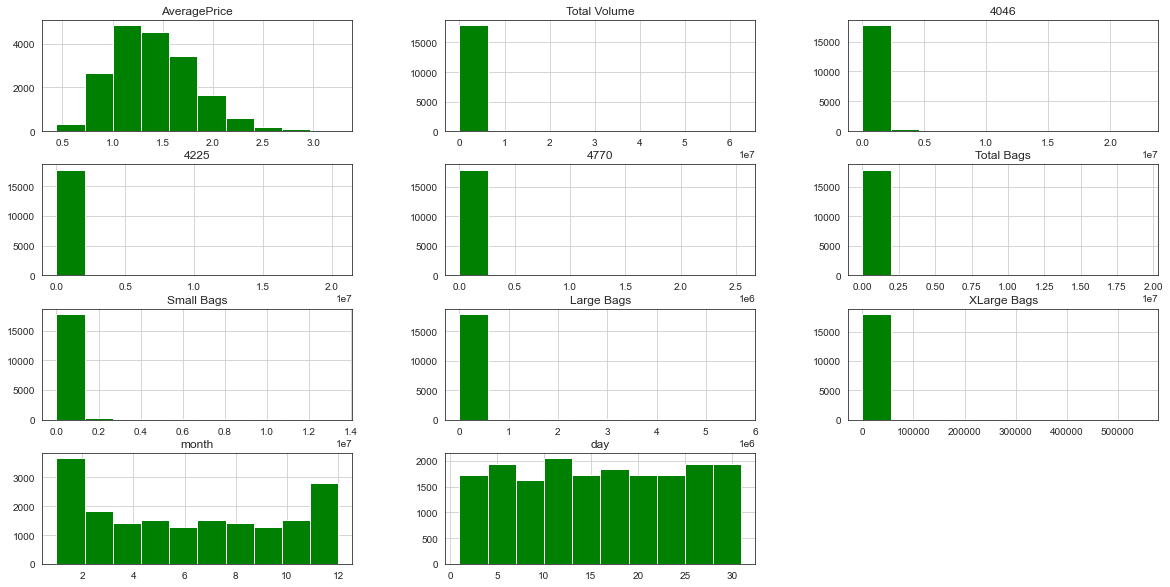

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,12.000000,31.000000


In [48]:
numbers = list(data.select_dtypes(['float64', 'int64']).keys())

# removing years
numbers.remove('year')

data[numbers].hist(figsize=(20,10), color='green', edgecolor='white')

plt.show()

display(data[numbers].describe())

<font color='blue'> **Average Price**

- Is the most normal distribution. Mean and median are really closed, which means the distribution is not severly influenced by outliers. Still, it is a bit skewed to the right, the mean being bigger than the median reflects that. Remaining features
- The remaining features are severely influenced by outliers, most of the values are located in the first bin of the histograms and the meean is way bigger than the median.
- These features seem to follow the same distribution, which makes sense since the information (quantity sold) is similar

Lets take the outliers out of the quantities to see if we can find a more normal distribution <font> 

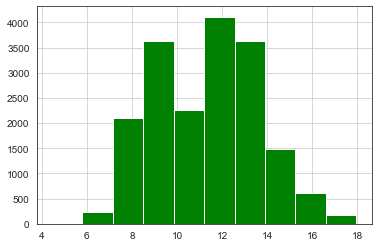

In [50]:
TotalLog = np.log(data['Total Volume'] + 1)
TotalLog.hist(color='green', edgecolor='white');

### Correlation

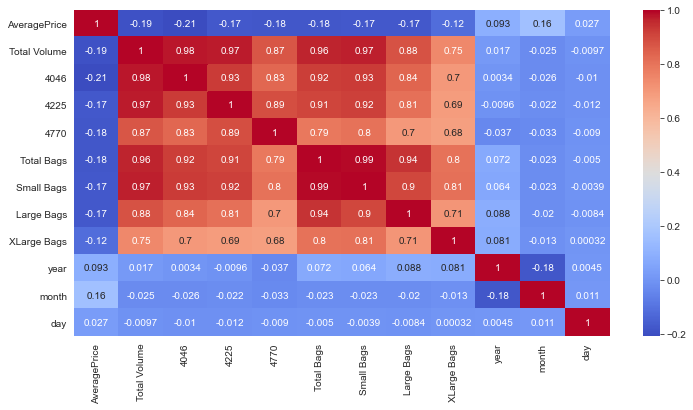

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True);

**Observation :**

There is a high correlation between pairs:

4046 & total volume (0.98)
4225 & total volume (0.97)
4770 & total volume (0.87)
total bags & total volume (0.96)
small bags & total bags (0.99)
etc

4046 avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.
Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [52]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
data.type = label.transform(data.type) 

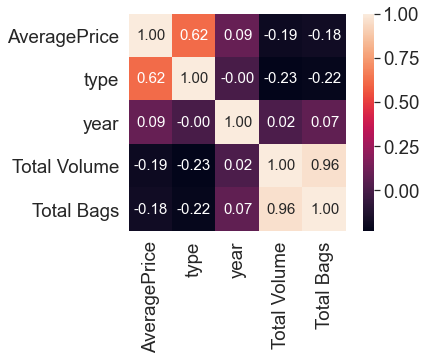

In [53]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

The price of avocado is influenced by the type. Logically. We also see a strong correlation between the features: "Total Bags" and "Total Volume". Also, if you look at the correlation of all the features, you will notice that strongly correlated Small Bags,Large Bag. It is logical but can create problems if we go to predict the price of avocado. 

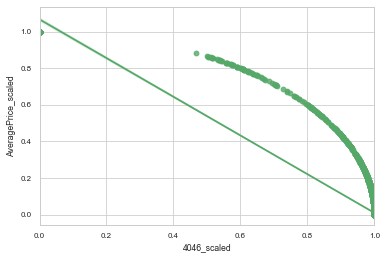

In [57]:
scaler = Normalizer()
scaler.fit(data[['4046', 'AveragePrice']].values)
data['4046_scaled'] = scaler.transform(data[['4046', 'AveragePrice']].values)[:,0]
data['AveragePrice_scaled'] = scaler.transform(data[['4046', 'AveragePrice']].values)[:,1]

sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=data, color='g')
plt.show()

**We now know that both the regression and classification is possible since there is a clear tendency**

<font color='blue'> *As we already see the field descriptions, so for our training we are interested only in fields as below*

In [58]:
# Specifying dependent and independent variables

X = data[['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]
Y = data['AveragePrice']
y=np.log1p(Y)

In [59]:
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,Albany
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,Albany
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,Albany
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,Albany
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,Albany


In [60]:
Y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

### Labeling the categorical variables

In [61]:
# X_labelled = pd.get_dummies(X[["type","region"]], drop_first = True)
# X_labelled.head()

X = pd.get_dummies(X, prefix=["type","region"], columns=["type","region"], drop_first = True)
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,type_1,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
print(X.columns)

Index(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'type_1', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       

## Split into Train and Valid set

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.3, random_state = 99)

In [65]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((12774, 61), (5475, 61), (12774,), (5475,))

## Training the Model

### Multiple Linear Regression

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print("R2 of Linear Regresson:", lr.score(X_train,y_train) )
print("----- Prediction Accuracy-----")
print('MAE: ',metrics.mean_absolute_error(y_valid, lr.predict(X_valid)))
print('MSE: ',metrics.mean_squared_error(y_valid, lr.predict(X_valid)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))))

R2 of Linear Regresson: 0.5617616259882802
----- Prediction Accuracy-----
MAE:  0.20301652029791603
MSE:  0.07278245038216838
RMSE: 0.2697822276988764


**R2 of Linear Regresson: 0.56176162598828**

**----- Prediction Accuracy-----**

**MAE:  0.20301652029791611**

**MSE:  0.07278245038216843**

**RMSE: 0.2697822276988765**

## Support Vector Regression

In [69]:
from sklearn.svm import SVR

#### *let's first choose the best kernel for our data out of provided kernels.*

In [70]:
#clf = svm.SVR(kernel = 'linear')
#clf.fit(X_train, y_train)
#confidence = clf.score(X_train, y_train)
#print(k,confidence)

In [71]:
#for k in ['linear','poly','rbf','sigmoid']:
#    print("Running for k as ", k)
#    clf = svm.SVR(kernel=k)
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_train, y_train)
#    print(k,confidence)

### Parameter Tuning or Hyperparameter

Intuitively, the *gamma* defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

The *C* parameter trades off correct classification of training examples against maximization of the decision function’s margin.

For larger values of *C*, a smaller margin will be accepted if the decision function is better at classifying all training points correctly.

A lower *C* will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In other words *C* behaves as a **regularization parameter** in the SVM.

In [72]:
svr = SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))

0.9384089180056469


In [73]:
from math import sqrt 

In [74]:
# calculate RMSE
error = sqrt(metrics.mean_squared_error(y_valid,svr.predict(X_valid))) 
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.40127249164482043


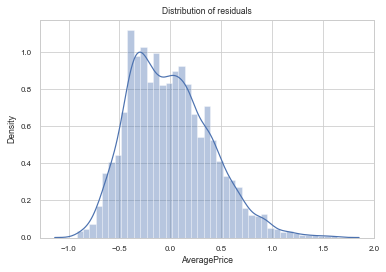

In [75]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_valid - svr.predict(X_valid))
plt.title('Distribution of residuals')
plt.show()

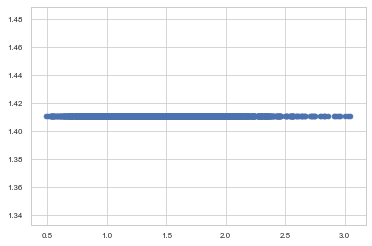

In [76]:
plt.scatter(y_valid,svr.predict(X_valid));

In [77]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_valid, svr.predict(X_valid))),4))

RMSE value of the Linear Regr :  0.2698
RMSE value of the SVR Model   :  0.4013


In [78]:
data=data.drop(['Date'], axis=1)

In [79]:
data_dt=data # for decision tree alogorithm

In [80]:
data=data.drop(['year_month'], axis=1)

## Train & Validation

As we are predicting the price of the avocados we are going to put the prices column in the Y and rest of the data in X

In [81]:
X=datam.drop('AveragePrice',1)
y=datam['AveragePrice']

In [82]:
print('shape of X and y respectively :',X.shape,y.shape)

shape of X and y respectively : (18249, 13) (18249,)


In [83]:
X.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### *performing a 80-20 train test split over the dataset.*

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (14599, 13) (14599,)
shape of X and y respectively(test) : (3650, 13) (3650,)


In [86]:
cols=X_train.columns

### Preprocessing

### <font color="green">Encoding

#### *Encoding all the categorical columns to dig deep into the data.*

In [87]:
scaler=LabelEncoder()

In [88]:
for col in X_train.columns:
    if datam[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

In [89]:
X_train.head()


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14902,2,154,1797.04,28.34,552.03,0.00,1216.67,264.39,952.28,0.00,1,2017,3
7537,13,143,362296.15,97772.92,104336.09,14152.16,146034.98,92339.30,52994.80,700.88,0,2017,36
9720,22,29,12801.03,11536.00,337.16,0.00,927.87,927.87,0.00,0.00,1,2015,11
2105,25,26,550810.62,161220.26,305122.62,17131.92,67335.82,67335.82,0.00,0.00,0,2015,40
18083,2,166,8634.75,2317.50,3561.20,0.00,2756.05,2752.63,3.42,0.00,1,2018,40


In [90]:
X_train.shape

(14599, 13)

### <font color="green">Variance thresholding

#### *Now after encoding the dataframe we have to omit the columns which are not contributing any pattern or key for finding good accuracy. That means we are going to drop the columns which have less variance than 0.1*

In [91]:
scaler=VarianceThreshold(0.1)

In [92]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (14599, 13)
shape of X (test) : (3650, 13)


### <font color="green">Scaling

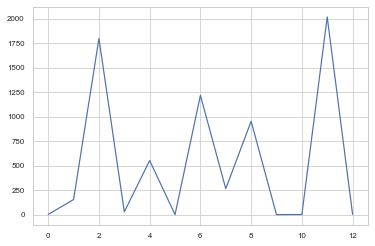

In [94]:
plt.plot(X_train[0]);

This graph shows that the every single feature has different value ranges. So we need to scale the data for better performances.

In [95]:
scaler=StandardScaler()

In [96]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [97]:
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


As a result of using the **variance thershold** and **standard scaler** of *sklearn module* the pandas dataframe changed in numpy ndarray. So we are going to convert them into pandas dataframe.

In [98]:
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.433439,1.432883,-0.245397,-0.230237,-0.243326,-0.214369,-0.242629,-0.245094,-0.217488,-0.177445,1.007080,0.900933,-1.505826
1,-0.725875,1.207846,-0.139340,-0.152215,-0.156342,-0.078814,-0.091821,-0.118423,0.001000,-0.136441,-0.992969,0.900933,0.611204
2,-0.146960,-1.124361,-0.242160,-0.221052,-0.243506,-0.214369,-0.242930,-0.244181,-0.221485,-0.177445,1.007080,-1.218764,-0.992607
3,0.046012,-1.185734,-0.083880,-0.101570,0.011944,-0.050273,-0.173775,-0.152821,-0.221485,-0.177445,-0.992969,-1.218764,0.867813
4,-1.433439,1.678379,-0.243386,-0.228410,-0.240804,-0.214369,-0.241026,-0.241671,-0.221471,-0.177445,1.007080,1.960781,0.867813


In [99]:
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.369115,-0.735660,-0.244631,-0.229176,-0.242334,-0.214369,-0.242536,-0.245279,-0.216549,-0.177445,1.007080,-1.218764,-1.634131
1,0.046012,-1.185734,-0.189818,-0.226356,-0.143668,-0.085100,-0.188836,-0.203317,-0.133165,-0.107003,-0.992969,-1.218764,-0.479388
2,1.010872,-0.428790,0.061641,-0.146391,0.051818,-0.124087,0.358279,0.102441,1.144522,-0.177445,1.007080,-0.158916,1.573490
3,-0.532903,1.146472,-0.243018,-0.230010,-0.240243,-0.214369,-0.238336,-0.242477,-0.208167,-0.177445,1.007080,0.900933,-1.120912
4,-0.918847,1.514715,-0.241159,-0.229041,-0.241291,-0.207405,-0.232473,-0.230435,-0.221276,-0.177445,1.007080,1.960781,1.701795


In [100]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## Pipeline

As this is a regression problem we are going to use famous regression models -

    Polynomial Regression
    RandomForest Regression
    Ridge Regression
    Lasso Regression
    Bayesian Ridge Regression

In [102]:
actr=[]
acts=[]
lstr=[]
lsts=[]

### Random Forest Regression

In [103]:
clf=RandomForestRegressor(random_state=0)

In [104]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

In [105]:
print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9870799424153677
test data accuracy : 0.9041218431459402
loss of train data : 0.0020920306623741355
loss of test data : 0.015617263465753418


So we can see the RFR really predicts the model very well and gives a quite accurate prediction.

In [106]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

# 70:30 split

In [110]:
from sklearn.model_selection import train_test_split

trainflights, testflights, ytrain, ytest = train_test_split(data, y, train_size=0.7,test_size=0.3, random_state=0)

In [111]:
s = (trainflights.dtypes == 'object')
object_cols = list(s[s].index)

n = (trainflights.dtypes == ('float64','int64'))
numerical_cols = list(n[n].index)

In [112]:
#checking the columns containing categorical columns:
print(object_cols)

['region']


In [113]:
#using One Hot Encoder to make the categorical columns usable

oneHot = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
oneHottrain = pd.DataFrame(oneHot.fit_transform(trainflights[object_cols]))
oneHottest = pd.DataFrame(oneHot.transform(testflights[object_cols]))

#reattaching index since OneHotEncoder removes them:
oneHottrain.index = trainflights.index
oneHottest.index = testflights.index 

#dropping the old categorical columns:
cattraincol = trainflights.drop(object_cols, axis=1)
cattestcol = testflights.drop(object_cols, axis=1)

#concatenating the new columns:
trainflights = pd.concat([cattraincol, oneHottrain], axis=1)
testflights = pd.concat([cattestcol, oneHottest], axis=1)

In [114]:
#scaling the values

trainf = trainflights.values
testf = testflights.values

minmax = MinMaxScaler()

trainflights = minmax.fit_transform(trainf)
testflights = minmax.transform(testf)

#defining a way to find Mean Absolute Percentage Error:
def PercentError(preds, ytest):
  error = abs(preds - ytest)

  errorp = np.mean(100 - 100*(error/ytest))

  print('the accuracy is:', errorp)

In [115]:
#implementing the algo:
model = RandomForestRegressor(n_estimators=100, random_state=0, verbose=1)

#fitting the data to random forest regressor:
model.fit(trainflights, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


RandomForestRegressor(random_state=0, verbose=1)

In [116]:
#predicting the test dataset:
preds = model.predict(testflights)
PercentError(preds, ytest)

the accuracy is: 99.99817549626454


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [117]:
#using linear regression:
LinearModel = LinearRegression()
LinearModel.fit(trainflights, ytrain)

LinearRegression()

In [118]:
#predicting on the test dataset:
LinearPredictions = LinearModel.predict(testflights)
PercentError(LinearPredictions, ytest)

the accuracy is: 100.0


# Decision-Tree

## Prediction for Small bags & The average price

In [119]:
df=data[["year","Small Bags","Large Bags", "AveragePrice"]]

df = df.sample(n=50,replace=True)
#df=df.head(50)
df.tail()

,year,Small Bags,Large Bags,AveragePrice
6029,2017,58990.64,4114.01,1.55
15650,2017,9090.71,62.45,2.17
74,2015,45114.22,12096.44,1.08
5528,2016,1344665.71,1012172.25,0.92
15819,2017,1988.81,3.33,2.45


In [120]:
y=df.iloc[:,1].values
x=df.iloc[:,-1].values

In [121]:
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

### Training the Decision Tree Regression model on the whole dataset

In [122]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [123]:
DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [124]:
## Predicting a new result: What is the price for the 
regressor.predict([[8042.21]])

array([1988.81])

In [125]:
regressor.predict([[8000]])

array([1988.81])

In [126]:
regressor.predict([[18000]])

array([1988.81])

### Visualization

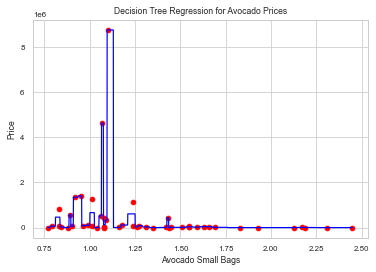

In [127]:
X_grid = np.arange(min(x), max(x), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x,y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")

plt.title("Decision Tree Regression for Avocado Prices")
plt.xlabel("Avocado Small Bags")
plt.ylabel("Price")
plt.show()

# Findings

- Conventional avocados sell way more than organic avocados and cost less. Therefore, Total volume, along with other volume variables, and average price, will work well to predict our target variable, type, in our classification model

- Average price and total volume move in different directions, this will come in handy when doing a regression analysis over our target variable, which is average price

- In the time series exploration, we see that there is a pike in total volume and a drop in prices at the beggining of the month, hinting for seasonality and forecasting possibilities

Normally, there is an inverse relationship between supply and prices. When there is an overproduction of avocados they will have a negative impact on the market price of avocados. Let's see if this is the case for both conventional and organic avocados.
Conventional: At the end of 2017 we can see a large drop in prices, at the same time there is an increasing amount of volume of avocados in the market.
Organic: Same happens with organic avocados, at the end of 2017 there is a big drop and we can see a huge increase in volume.
Volume peaks: Notice how each volume peak is a signal for an upcoming drop in avocado prices.